Filename: /home/bengreen/University/Part III/stellar-heterogeneity-modelling/spots_and_faculae_model/assets/ADP.2016-02-04T01_02_52.843.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    3078   ()      
  1  SPECTRUM      1 BinTableHDU     45   1R x 3C   ['313117D', '313117E', '313117E']   
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =              5009872 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  =

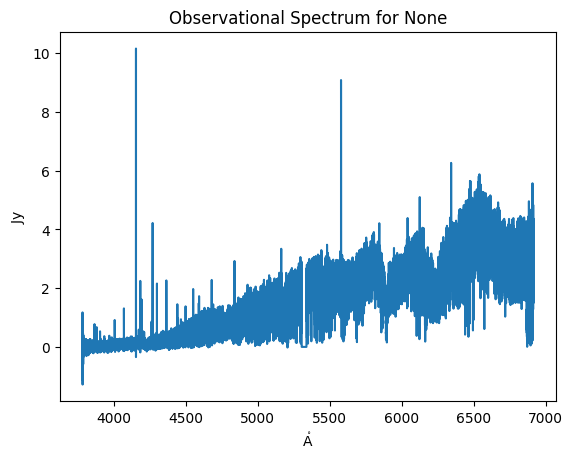

[3782.07 3782.08 3782.09 ... 6913.21 6913.22 6913.23] Angstrom
reading in hdf5
finished reading in hdf5
[ 3.19876138  3.19885912  3.19895555 ... 11.35229309 11.35306054
 11.3538273 ] Jy


In [ ]:


# for now, just request a random composite spectrum from facula_and_spot_creator
# and try to decompose it - aka can we regenerate the w's

# eventually can read in external data or some training data from a large hdf5 file etc

from pathlib import Path
import numpy as np
from astropy.visualization import quantity_support
quantity_support()
import astropy.units as u
import os
from astropy.visualization import quantity_support
quantity_support()

from spots_and_faculae_model.spectrum import spectrum
from spots_and_faculae_model.simpler_spectral_grid import simpler_spectral_grid
from spots_and_faculae_model.readers import read_HARPS_fits

external_spectrum_path = Path("../../assets/ADP.2016-02-04T01_02_52.843.fits")
script_dir = os.getcwd()  # usually the folder where notebook is running")
wavelength_grid_absolute_path = (script_dir / external_spectrum_path).resolve()

spectrum_to_decompose : spectrum = read_HARPS_fits(wavelength_grid_absolute_path, INTEGRATION_INDEX=0, verbose=True)
spectrum_to_decompose.plot()
print(spectrum_to_decompose.Wavelengths)

mask = np.isfinite(spectrum_to_decompose.Fluxes)

spectrum_to_decompose = spectrum_to_decompose[mask]

print("reading in hdf5")
spectral_grid_relative_path = Path("../../assets/HARPS_convolved_spectral_grid.hdf5")
spectral_grid_absolute_path = (script_dir / spectral_grid_relative_path).resolve()
spec_grid : simpler_spectral_grid = simpler_spectral_grid.from_hdf5(absolute_path=spectral_grid_absolute_path)
lookup_table = spec_grid.to_lookup_table()